<a href="https://colab.research.google.com/github/tapaskumarpaul84/image_classification/blob/main/image_classification_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import all the required library
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Images data are in two different folder , so mentioned function will return a training data like dataframe with image array and their label
def create_training_data(datadirectory,classes):
    training_data=[]
    img_size=224
    for category in classes:
        path=os.path.join(datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
    return training_data

In [ ]:
# shuffle the training data and return as X and Y
def image_to_array(training_data):
  img_size=224
  random.shuffle(training_data)
  X=[]
  y=[]
  for features,label in training_data:
    X.append(features)
    y.append(label)
  X=np.array(X).reshape(-1,img_size,img_size,3)
  Y=np.array(y)
  return X,Y

In [ ]:
# convert data into pickle format
def convert_to_pickle(path,data):
  pickle_out=open(path,'wb')
  pickle.dump(data,pickle_out)
  pickle_out.close()
  return 'converted to pickle'

In [ ]:
Datadirectory="/content/drive/MyDrive/image_data"
Classes=['george','no_george']
training_data=create_training_data(Datadirectory,Classes)
print(len(training_data))

6047


In [ ]:
X,Y=image_to_array(training_data)

In [ ]:
path_X='/content/sample_data/X.pickle'
path_Y='/content/sample_data/Y.pickle'
convert_to_pickle(path_X,X)
convert_to_pickle(path_Y,Y)

'converted to pickle'

In [ ]:
pickle_in=open("/content/sample_data/X.pickle",'rb')
X=pickle.load(pickle_in)

pickle_in_y=open("/content/sample_data/Y.pickle",'rb')
Y=pickle.load(pickle_in_y)

In [ ]:
model=tf.keras.applications.mobilenet.MobileNet()#pretrained model for imagenet

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
# pretrained mobilenet model classify data into 1000 classess but we need it for binary classification, change the dense layer neuron or output count to 1.
# its a binary classification I predict the dense layer prediction score to 0-1. so,Use sigmoid activation function
base_input=model.layers[0].input
base_output=model.layers[-4].output

Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary() # now new model output layer's node is only one instead of 1000

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# train the model with 20 epoch and split the data into 80%:20%. use 80% for training and remaining 20% for testing.
history=new_model.fit(X,Y,epochs=20,validation_split=0.2)

Epoch 1/20
152/152 [==============================] - 50s 162ms/step - loss: 0.4259 - accuracy: 0.8431 - val_loss: 0.3021 - val_accuracy: 0.8835
Epoch 2/20
152/152 [==============================] - 23s 148ms/step - loss: 0.1859 - accuracy: 0.9320 - val_loss: 0.3083 - val_accuracy: 0.8785
Epoch 3/20
152/152 [==============================] - 23s 152ms/step - loss: 0.1494 - accuracy: 0.9446 - val_loss: 0.3743 - val_accuracy: 0.8612
Epoch 4/20
152/152 [==============================] - 24s 155ms/step - loss: 0.1004 - accuracy: 0.9665 - val_loss: 0.3069 - val_accuracy: 0.8942
Epoch 5/20
152/152 [==============================] - 23s 153ms/step - loss: 0.0755 - accuracy: 0.9731 - val_loss: 0.3820 - val_accuracy: 0.8917
Epoch 6/20
152/152 [==============================] - 23s 153ms/step - loss: 0.0681 - accuracy: 0.9779 - val_loss: 0.3377 - val_accuracy: 0.8736
Epoch 7/20
152/152 [==============================] - 23s 153ms/step - loss: 0.0666 - accuracy: 0.9771 - val_loss: 0.5018 - val_ac

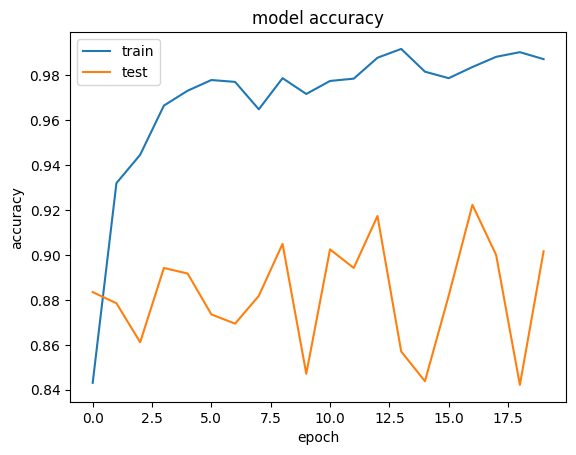

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

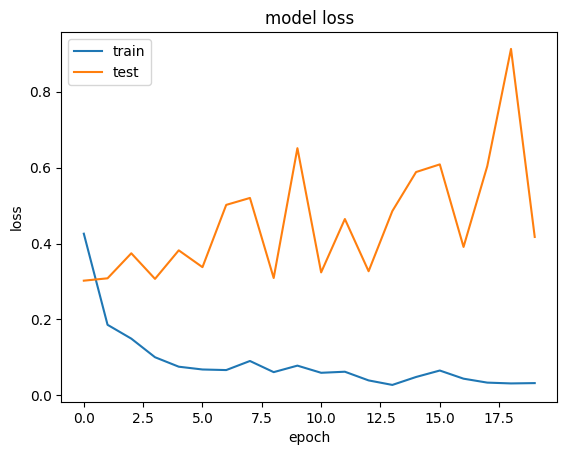

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# preprocess and convert the image into 224*224 size, before prediction
def process_image(path):
  frame1=cv2.imread(path)
  final_image1=cv2.resize(frame1,(224,224))
  final_image1=np.expand_dims(final_image1,axis=0)
  plt.imshow(cv2.cvtColor(frame1,cv2.COLOR_BGR2RGB))
  return final_image1

In [ ]:
def class_prediction(path):
  final_process_image=process_image(path)
  predictions=new_model.predict(final_process_image)
  prediction_score=predictions[0][0]
  if prediction_score<0.5:
    category='George'
  else:
    category='no_george'
  #print(category)
  return category


1/1 [==============================] - 1s 727ms/step
George


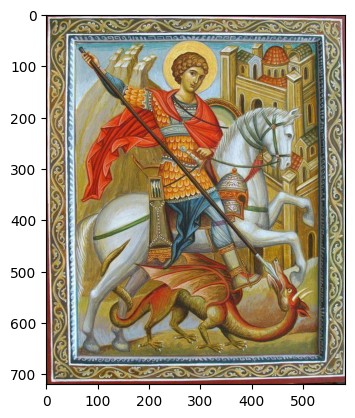

In [ ]:

path1="/content/drive/MyDrive/image_data/george/george_1000.jpg"
category=class_prediction(path1)
print(category)

1/1 [==============================] - 0s 32ms/step
no_george


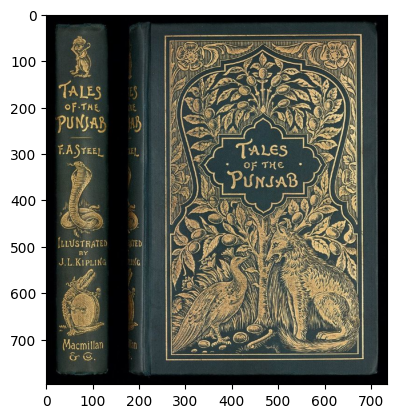

In [ ]:
path2="/content/drive/MyDrive/image_data/no_george/no_george_1004.jpg"
category=class_prediction(path2)
print(category)

In [ ]:
new_model.save("/content/drive/MyDrive/Colab Notebooks/george_mobilenetV2.h5")